# 1 读入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读入数据
data_src = pd.read_csv("./Data/winemag-data_first150k.csv", index_col=0)
# 取一部分数据
data_src = data_src[:10000]
# 移除“description”列
data_src = data_src.drop(['description'], axis=1)
# 移除“region_2”列，因为是region_1的细分地区，且大部分为空
data_src = data_src.drop(['region_2'], axis=1)
data_src

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
9995,Chile,Fina Reserva Ensamblaje Sauvignon Blanc-Chardo...,81,19.0,Colchagua Valley,NaN,White Blend,Estampa
9996,Chile,Reserva,81,10.0,Maule Valley,NaN,Cabernet Sauvignon,Viña Casas Patronales
9997,Chile,NaN,81,13.0,Central Valley,NaN,Sauvignon Blanc,Kon Tiki
9998,Chile,Gran Reserva,81,11.0,Leyda Valley,NaN,Sauvignon Blanc,Autoritas


# 2 数据可视化和摘要
## 2.1 统计标称型属性的频数

In [3]:
# 标称型属性
nom_features = list(data_src.select_dtypes(include=['object']))
# 数值型属性
num_features = list(data_src.select_dtypes(include=['int64','float64']))

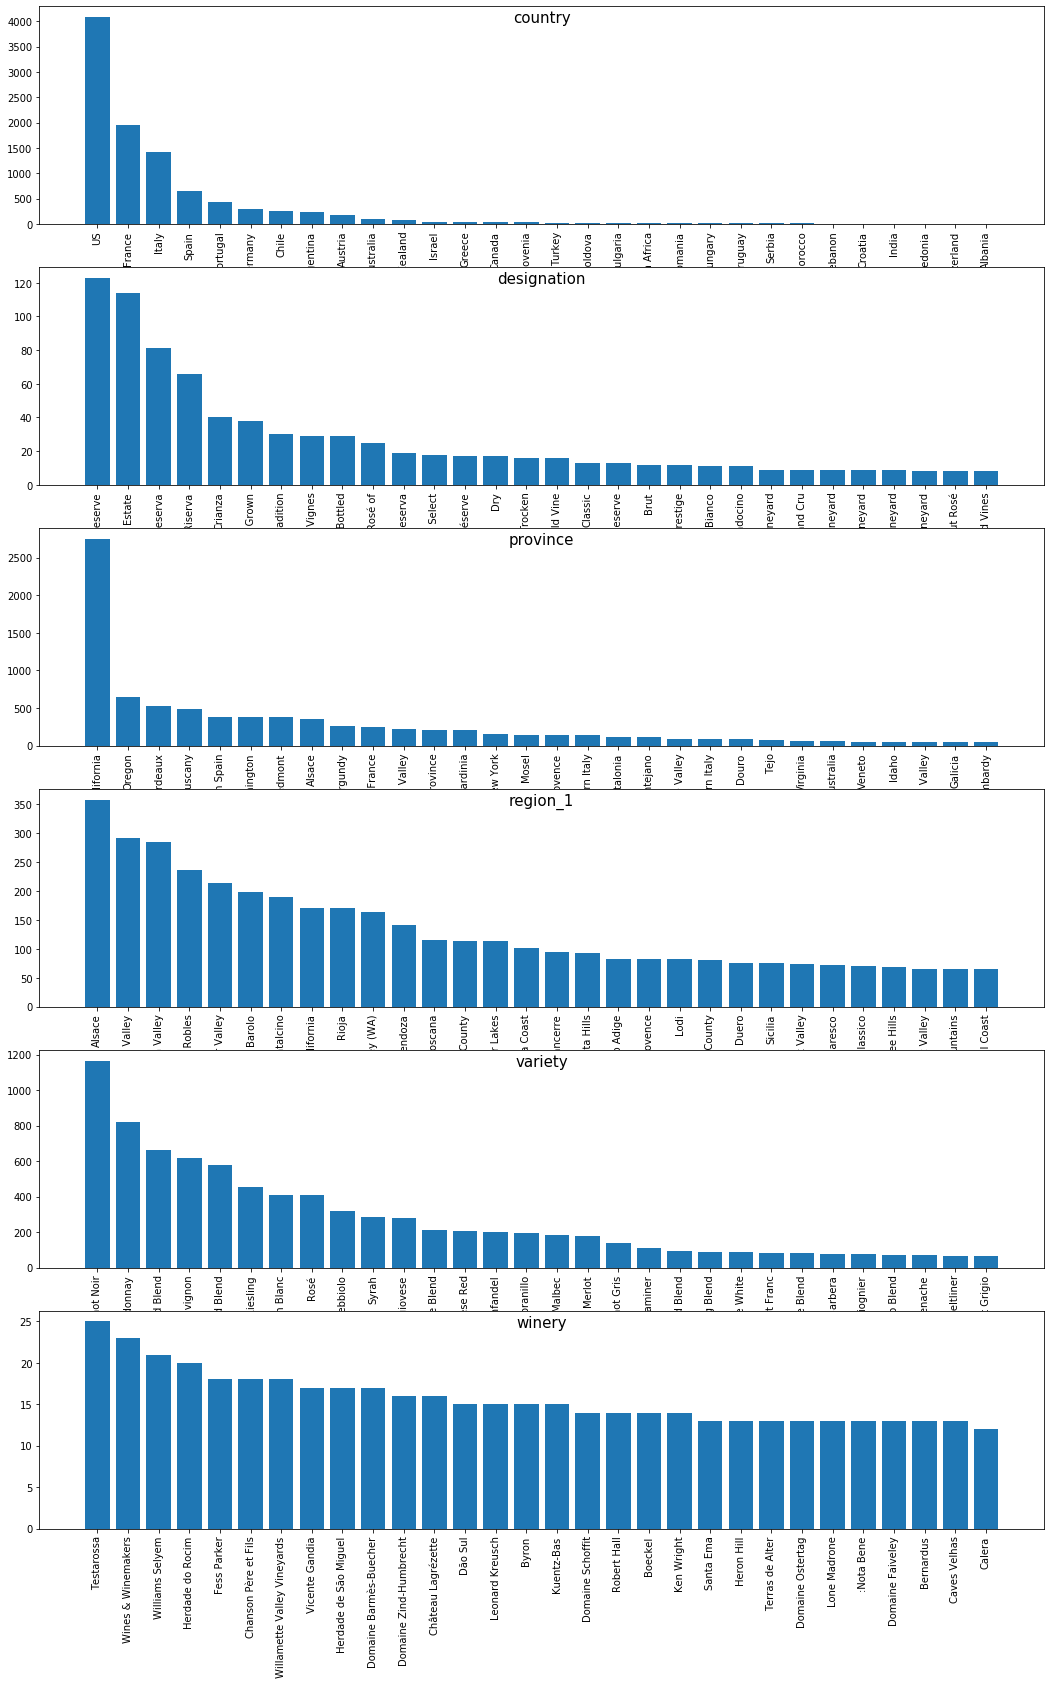

In [4]:
# 统计标称型属性的频数
def statNomFeatFreqs(data,data2=None):
    plt.figure(figsize=(18,28))
    i = 1
    
    def getFreqList(data):
        freqs = dict(data[nomfeatname].value_counts())
        
        # 数量太多时只显示最高频数的部分
        maxn=30
        if len(freqs) > maxn:
            freqs = [list(freqs.keys())[:maxn],list(freqs.values())[:maxn]]
        else:
            freqs = [freqs.keys(),freqs.values()]
        
        return freqs
    
    for nomfeatname in nom_features:
        if data2 is None:
            freqs = getFreqList(data)
            plt.subplot(6,1,i)
            i = i+1
            plt.bar(freqs[0],freqs[1])
            plt.xticks(rotation=90)
            plt.title(nomfeatname,y=0.9,fontdict={'weight':'normal','size': 15})
        else:
            freqs1 = getFreqList(data)
            freqs2 = getFreqList(data2)
            
            plt.subplot(6,2,i)
            i = i+1
            plt.bar(freqs1[0],freqs1[1])
            plt.xticks(rotation=90)
            plt.title(nomfeatname,y=0.9,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(6,2,i)
            i = i+1
            plt.bar(freqs2[0],freqs2[1],color='green')
            plt.xticks(rotation=90)
            plt.title(nomfeatname,y=0.9,fontdict={'weight':'normal','size': 15})
        pass
    pass
statNomFeatFreqs(data_src)

## 2.2 数值型属性的5数概括及统计缺失值

In [5]:
# 计算数值型属性的5数概括
num_stats = []
for numfeatname in num_features:
    desc = data_src[numfeatname].describe()
    stats = [desc['min'],desc['25%'],desc['50%'],desc['75%'],desc['max']]
    num_stats.append(stats)
print(num_stats)

# 统计数值型属性的缺失值
num_nans = []
for numfeatname in num_features:
    num_nans.append(data_src[numfeatname].isnull().sum())
print(num_nans)

[[80.0, 87.0, 88.0, 90.0, 100.0], [4.0, 18.0, 26.0, 42.0, 848.0]]
[0, 539]


## 2.3 使用直方图、盒图检查数值型属性的分布

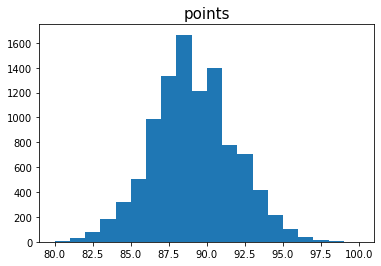

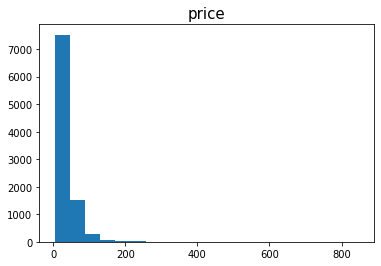

In [6]:
# 绘制数值型属性的直方图
def drawNumFeatHist(data,data2=None):
    if data2 is None:
        for numfeatname in num_features:
            plt.hist(list(data[numfeatname].dropna(axis=0)),bins=20)
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
            plt.show()
    else:
        plt.figure(figsize=(15,10))
        i = 1
        for numfeatname in num_features:
            plt.subplot(2,2,i)
            i = i+1
            plt.hist(list(data[numfeatname].dropna(axis=0)),bins=20)
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(2,2,i)
            i = i+1
            plt.hist(list(data2[numfeatname].dropna(axis=0)),bins=20,color='green')
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
        pass
    pass
drawNumFeatHist(data_src)

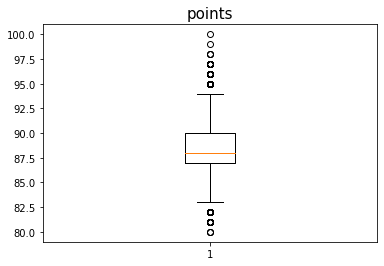

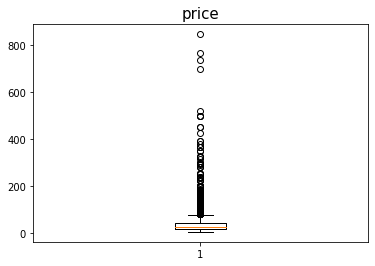

In [7]:
# 绘制数值型属性的盒图
def drawNumFeatBoxPlot(data,data2=None):
    if data2 is None:
        for numfeatname in num_features:
            plt.boxplot(list(data[numfeatname].dropna(axis=0)))
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
            plt.show()
    else:
        plt.figure(figsize=(15,10))
        i = 1
        
        for numfeatname in num_features:
            plt.subplot(2,2,i)
            i = i+1
            plt.boxplot(list(data[numfeatname].dropna(axis=0)))
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(2,2,i)
            i = i+1
            plt.boxplot(list(data2[numfeatname].dropna(axis=0)))
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
        pass
    pass
drawNumFeatBoxPlot(data_src)

可见points属性大部分集中在80到90之间；price属性绝大多数小于100，少数离群点的数值离中位数极远。

# 3 数据缺失的处理
## 3.1 统计各属性缺失值数目

In [8]:
# 统计各属性缺失值数目
data_src.isnull().sum()

country           2
designation    2929
points            0
price           539
province          2
region_1       1560
variety           0
winery            0
dtype: int64

可见数据集中有一部分缺失值。country、province和region_1缺失表示该酒的产地不明确，designation缺失表示该酒的原料产地不明确，price缺失表示该酒的价格未知。下面分别尝试使用四种方式处理这些缺失值。

## 3.2 缺失值处理--剔除缺失部分

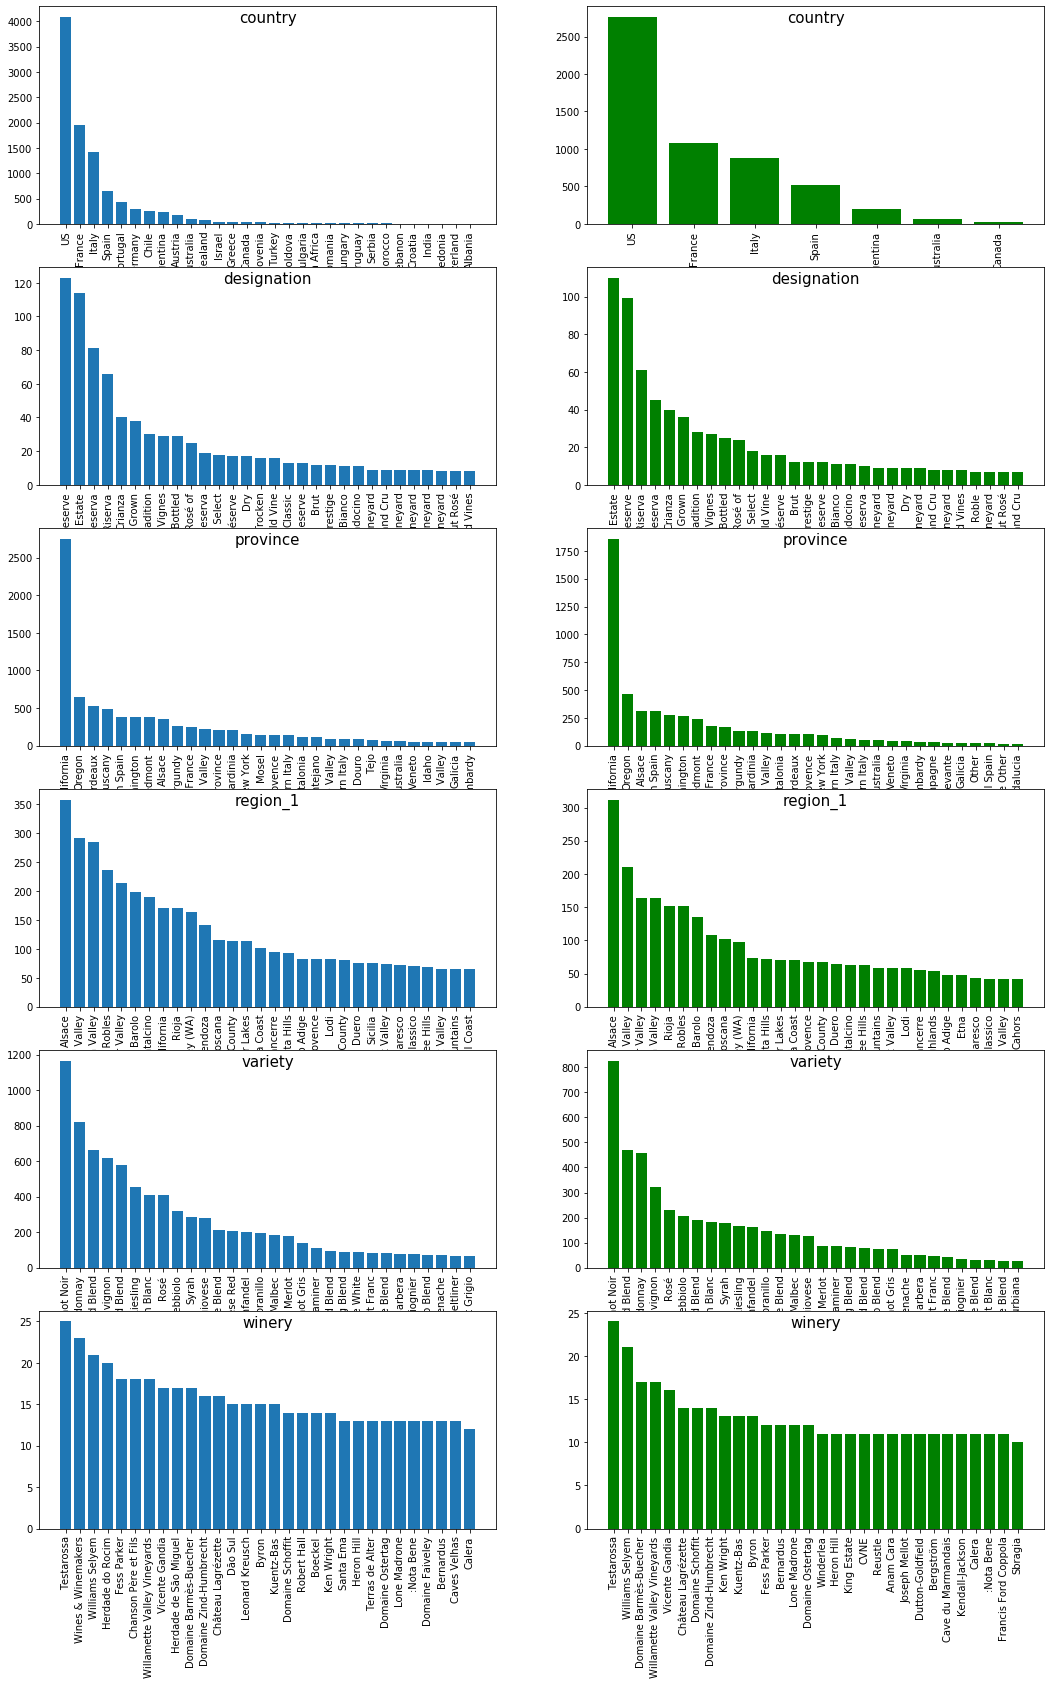

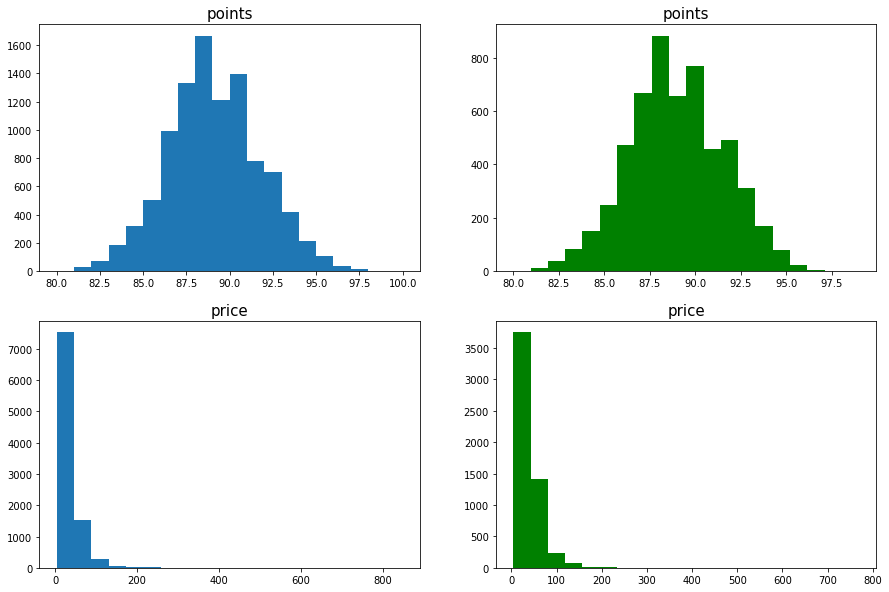

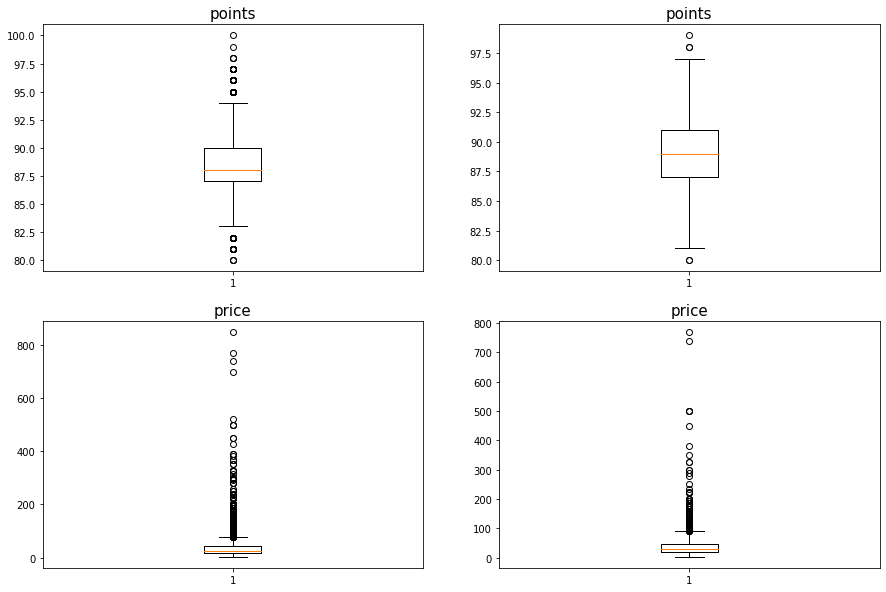

In [9]:
# 剔除缺失部分
data_dropnan = data_src.dropna(axis=0)

# 可视化数据
statNomFeatFreqs(data_src,data_dropnan)
drawNumFeatHist(data_src,data_dropnan)
drawNumFeatBoxPlot(data_src,data_dropnan)

剔除缺失部分后，country只剩下7个了，说明数据集里只有这7个国家的酒的数据比较完善。从price和points统计可以看出低价酒和低品质酒的数量变少了很多，说明这部分酒的数据不完善。

## 3.3 缺失值处理--用最高频率值来填补缺失值

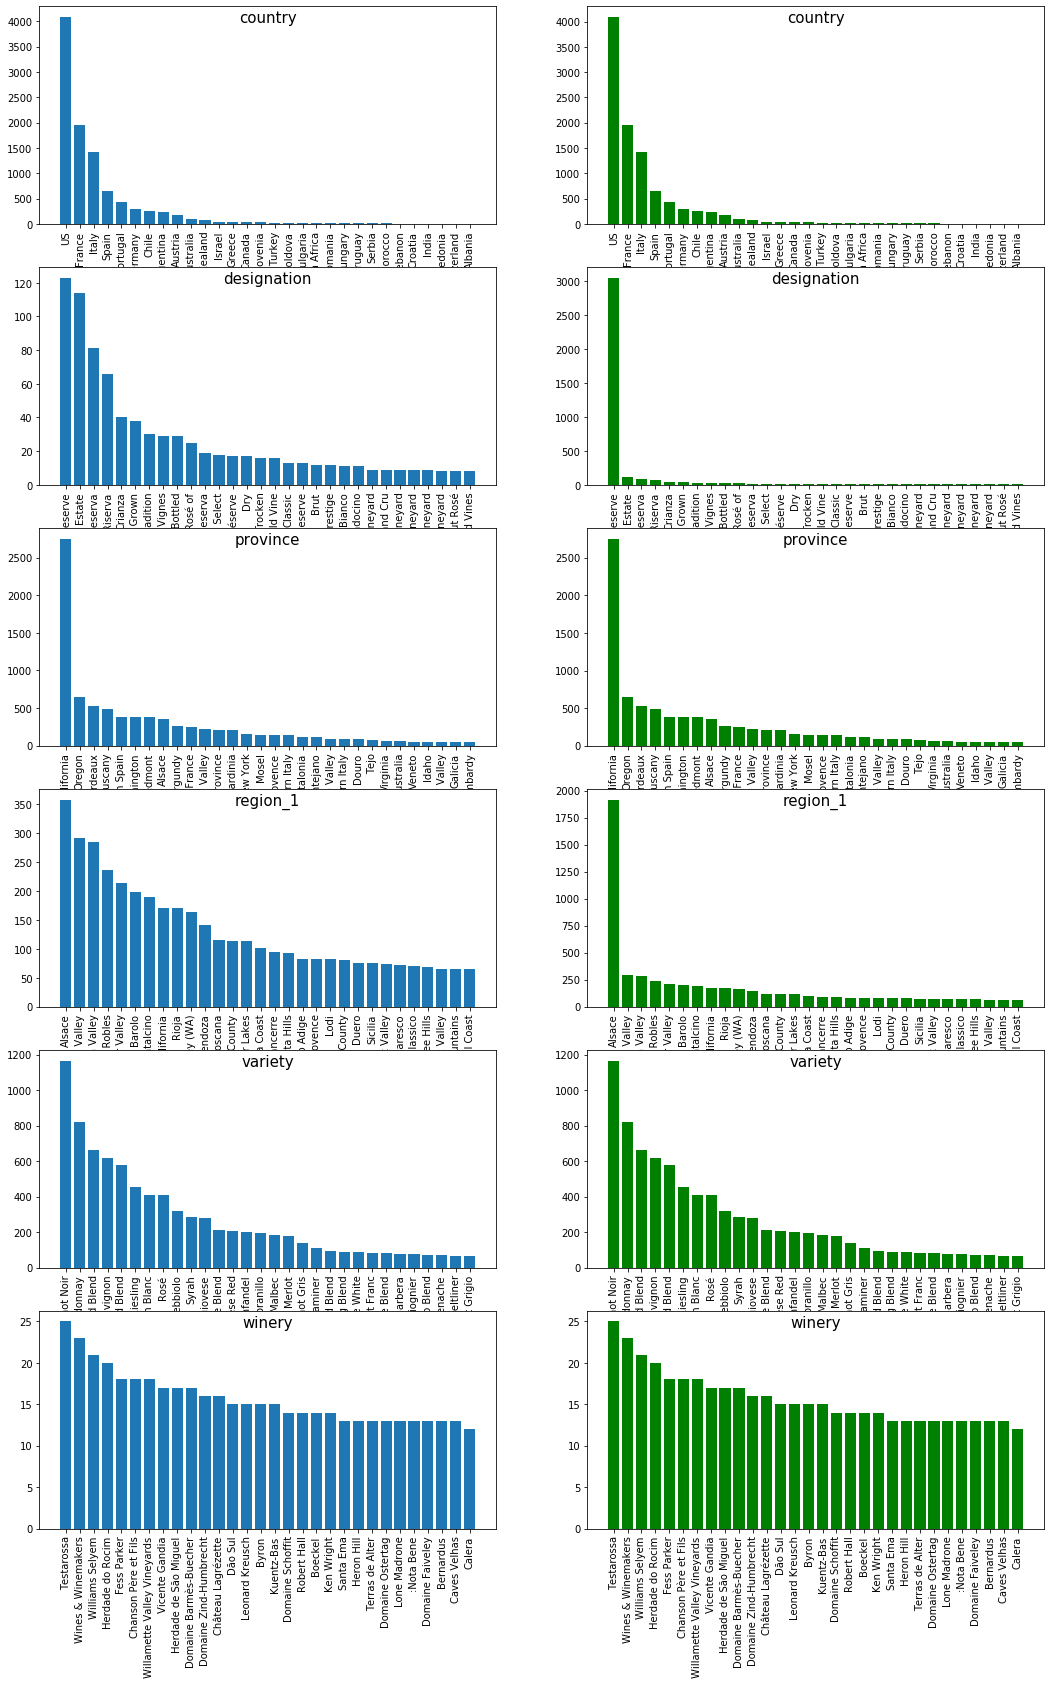

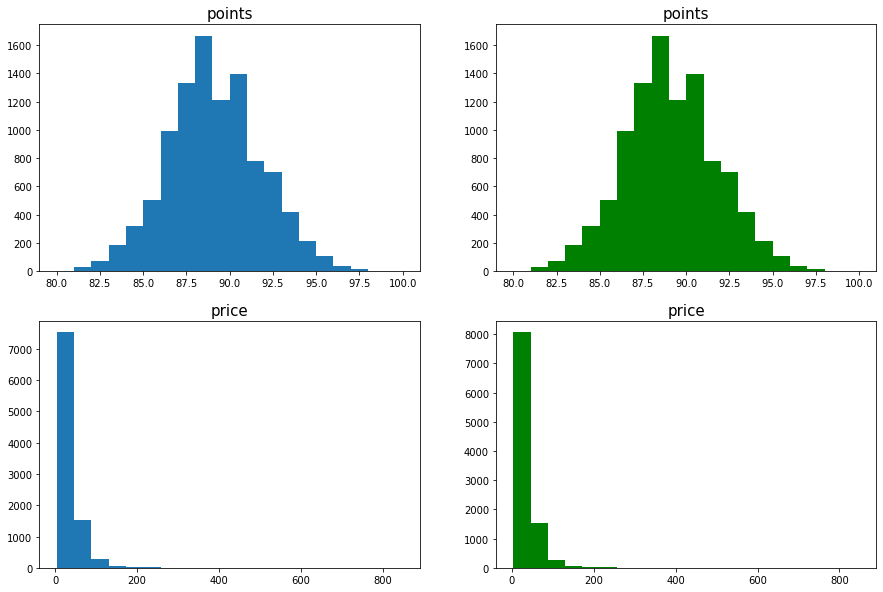

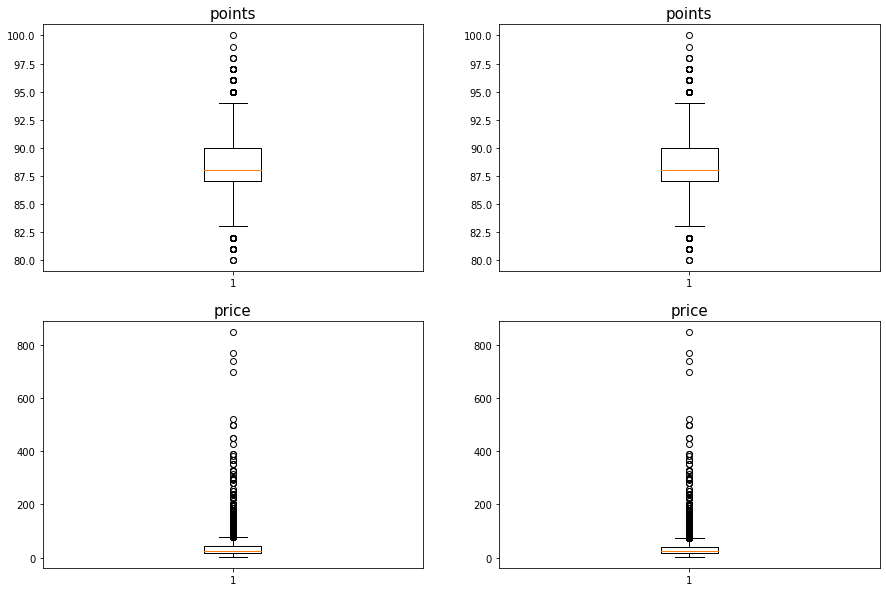

In [10]:
# 用最高频率值来填补缺失值
data_fill_mostfreq = data_src.copy()
for featname in data_fill_mostfreq.columns:
    mostfreqval = list(dict(data_fill_mostfreq[featname].value_counts()).keys())[0]
    data_fill_mostfreq[featname].fillna(mostfreqval,inplace=True)

# 可视化数据
statNomFeatFreqs(data_src,data_fill_mostfreq)
drawNumFeatHist(data_src,data_fill_mostfreq)
drawNumFeatBoxPlot(data_src,data_fill_mostfreq)

处理之后，频率最高的属性值的频数变得更高了。这样处理问题很大。

## 3.4 缺失值处理--通过属性的相关关系来填补缺失值

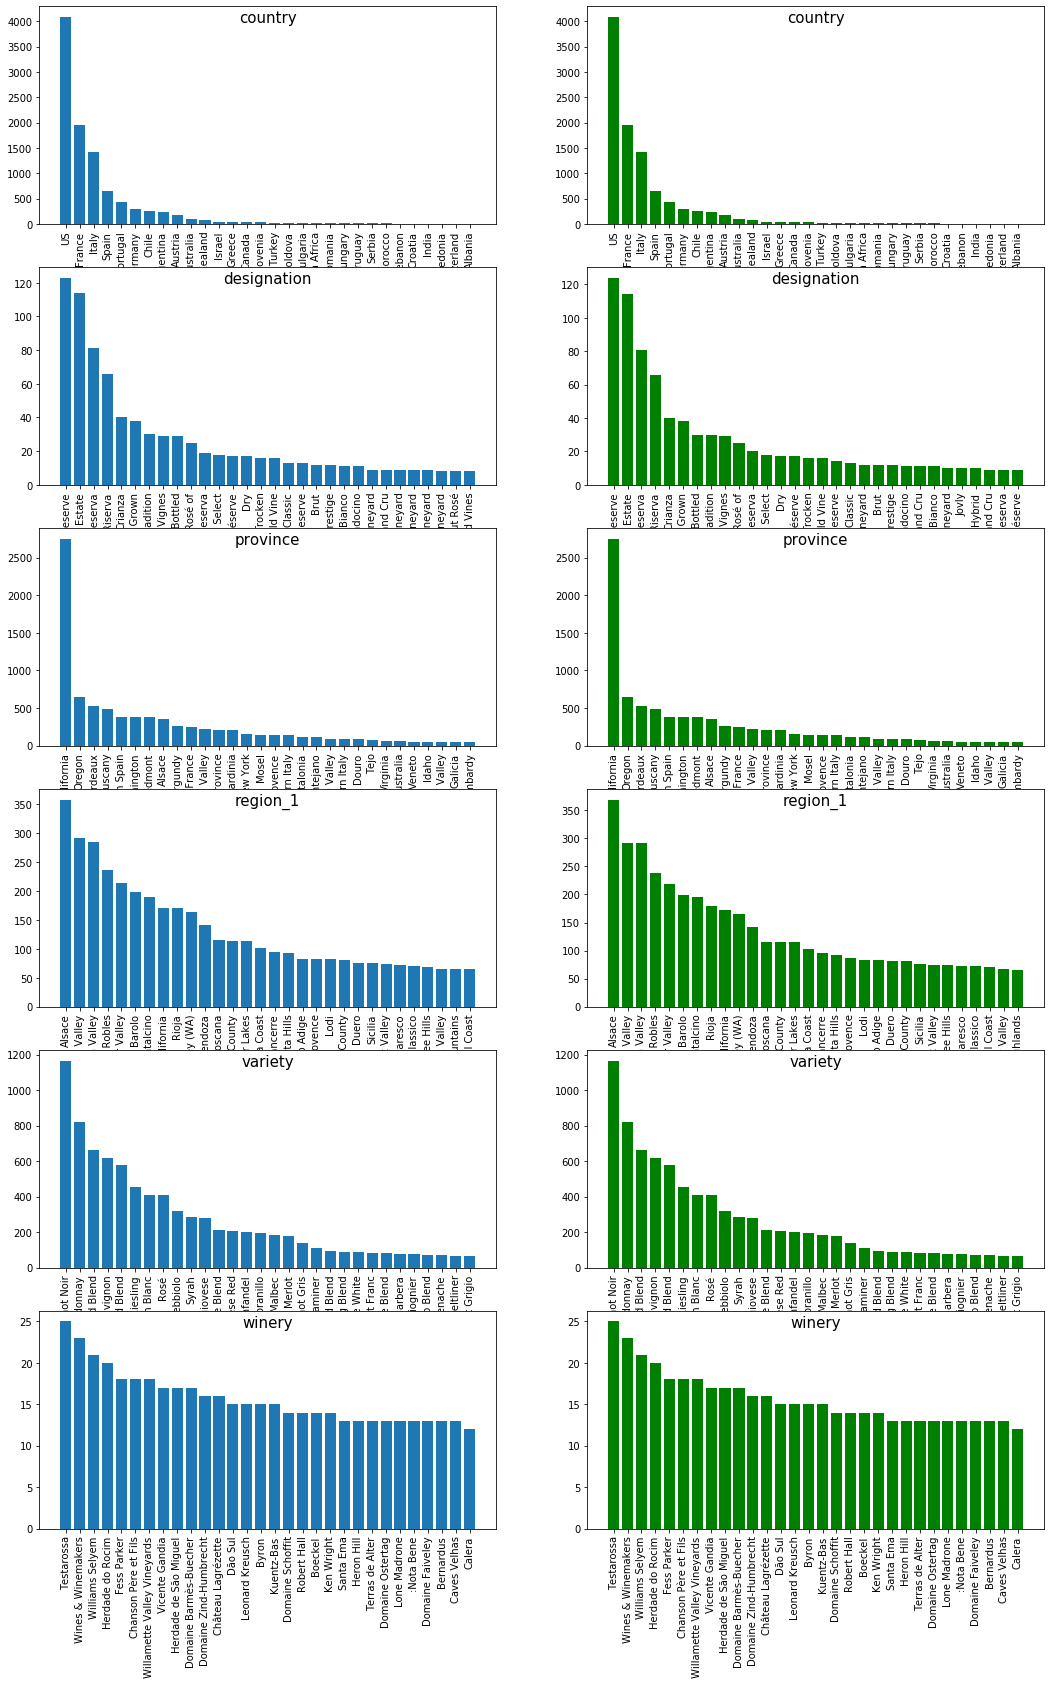

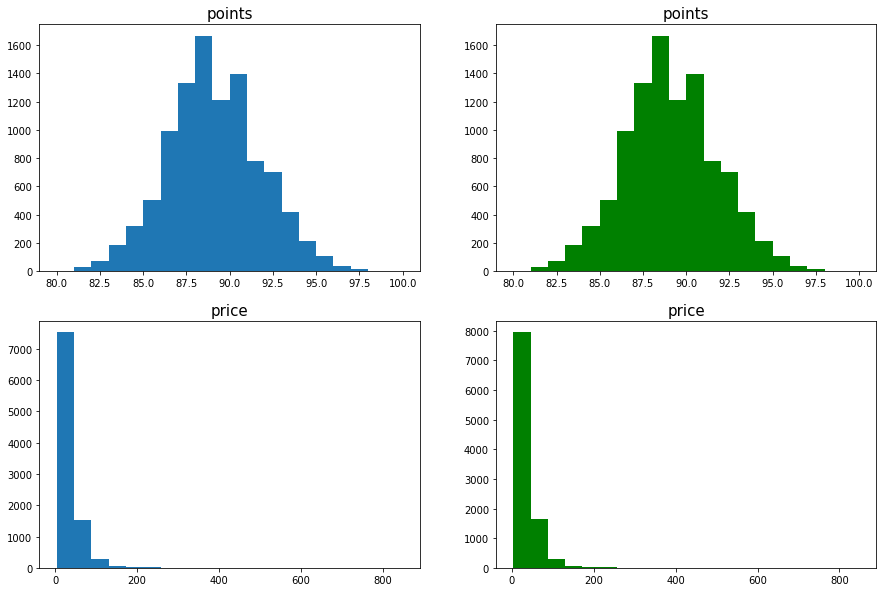

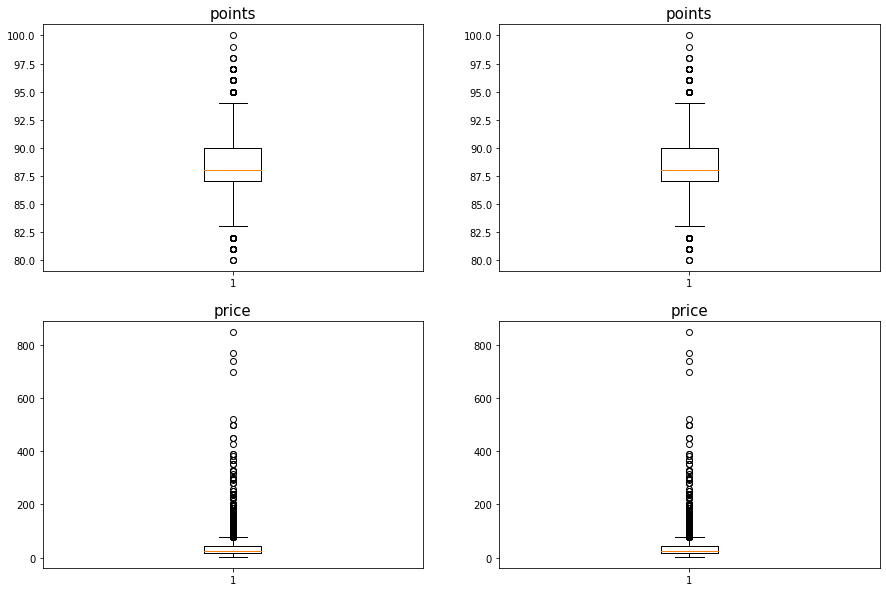

In [11]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# 通过属性的相关关系来填补缺失值
def fillna_rfr(data,predfeatname):
    # 用'NULL'(标称型属性)或-100(数值型属性)作为取值来填充非预测属性的缺失值
    data_filled = data.copy()
    for featname in data_filled.columns:
        if featname == predfeatname:
            continue
        if featname in num_features:
            data_filled[featname].fillna(-100,inplace=True)
        else:
            data_filled[featname].fillna('NULL',inplace=True)
        pass
    
    # 属性编码
    encx=preprocessing.OrdinalEncoder()
    encx.fit(data_filled.drop([predfeatname],axis=1))
    ency=preprocessing.OrdinalEncoder()
    ency.fit(data_filled[predfeatname].dropna(axis=0).values.reshape(-1,1))
    
    # 分割训练数据和预测数据
    data_train = data_filled[data_filled[predfeatname].notna()]
    data_pred = data_filled[data_filled[predfeatname].isna()]
    data_train_x = data_train.drop([predfeatname],axis=1)
    data_train_y = data_train[predfeatname]
    data_pred_x = data_pred.drop([predfeatname],axis=1)
    
    # 用RandomForestRegressor预测缺失值
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
    rfr.fit(encx.transform(data_train_x),ency.transform(data_train_y.values.reshape(-1,1)).ravel())
    pred_y = rfr.predict(encx.transform(data_pred_x))
    data_pred_y = ency.inverse_transform(pred_y.reshape(-1,1))
    
    # 用预测的缺失值进行填充
    nanidxs = data_filled[data_filled.isna().values==True].index.values
    predidx = 0
    for idx in nanidxs:
        data.loc[idx,predfeatname] = data_pred_y[predidx][0]
        predidx = predidx+1
    pass

data_fill_rfr = data_src.copy()
fillna_rfr(data_fill_rfr,'price')
fillna_rfr(data_fill_rfr,'country')
fillna_rfr(data_fill_rfr,'designation')
fillna_rfr(data_fill_rfr,'province')
fillna_rfr(data_fill_rfr,'region_1')

# 可视化数据
statNomFeatFreqs(data_src,data_fill_rfr)
drawNumFeatHist(data_src,data_fill_rfr)
drawNumFeatBoxPlot(data_src,data_fill_rfr)

可见处理前后，数据集的总体统计特征无明显变化，说明对缺失值的预测较为合理。

## 3.5 缺失值处理--通过数据对象之间的相似性来填补缺失值

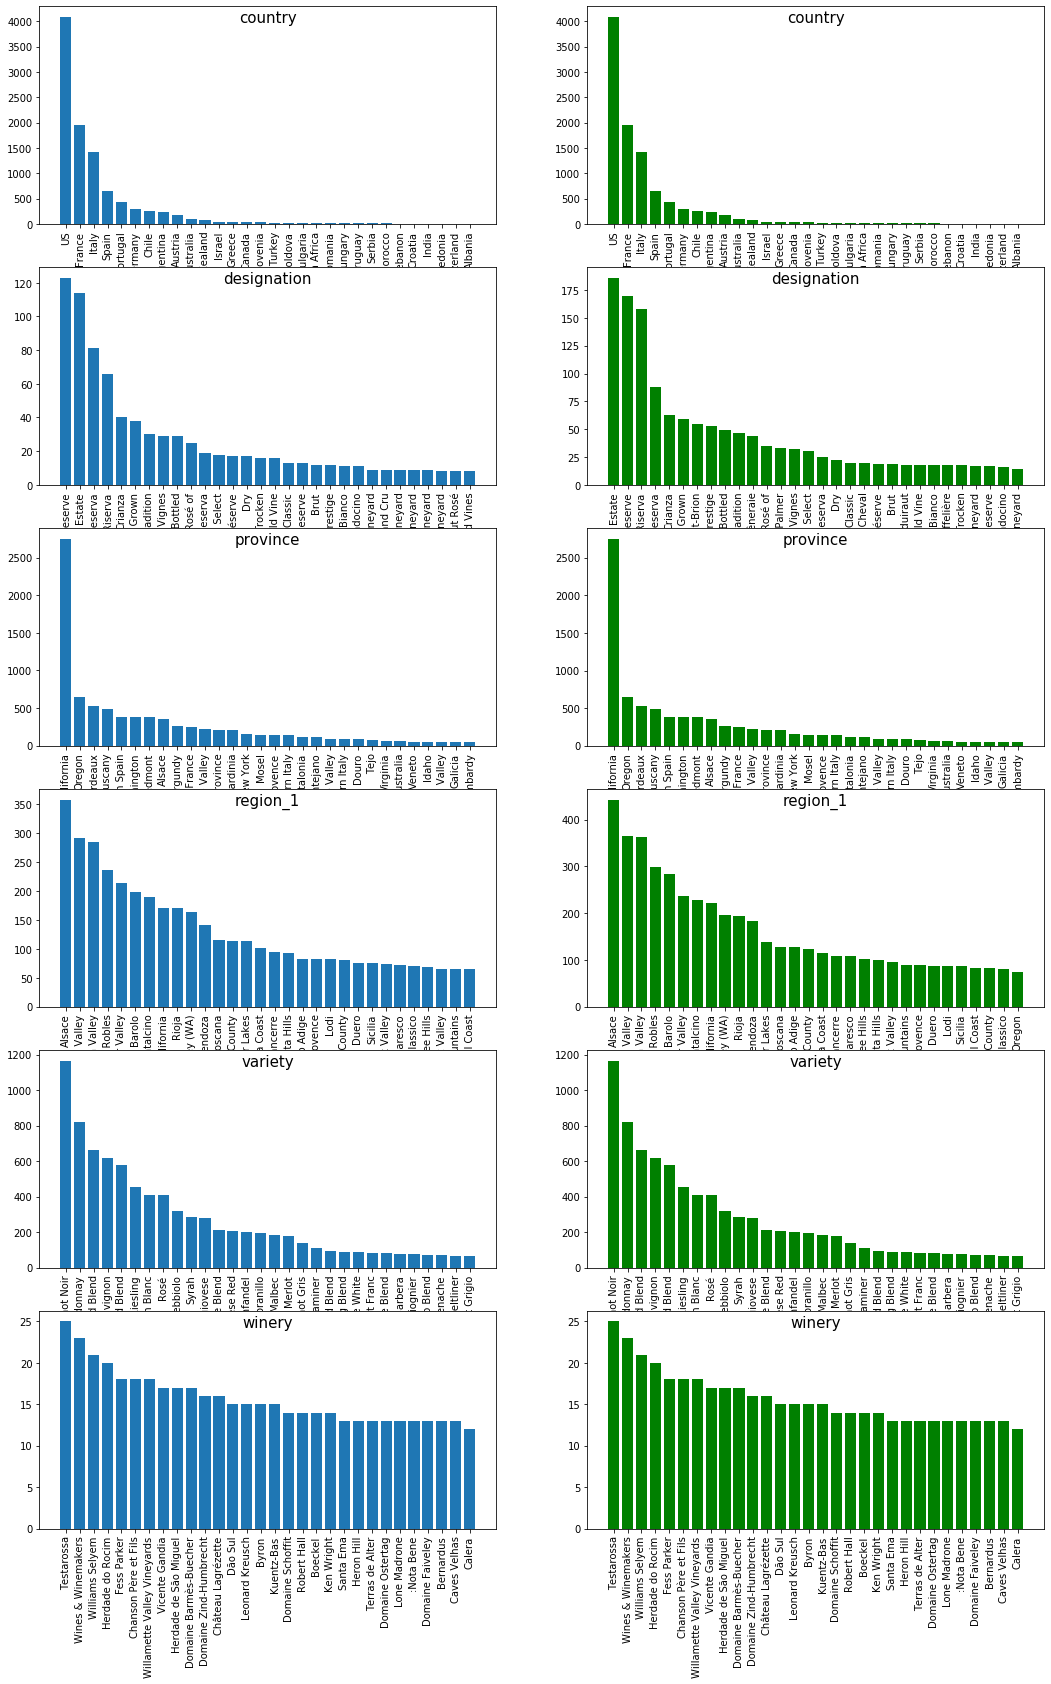

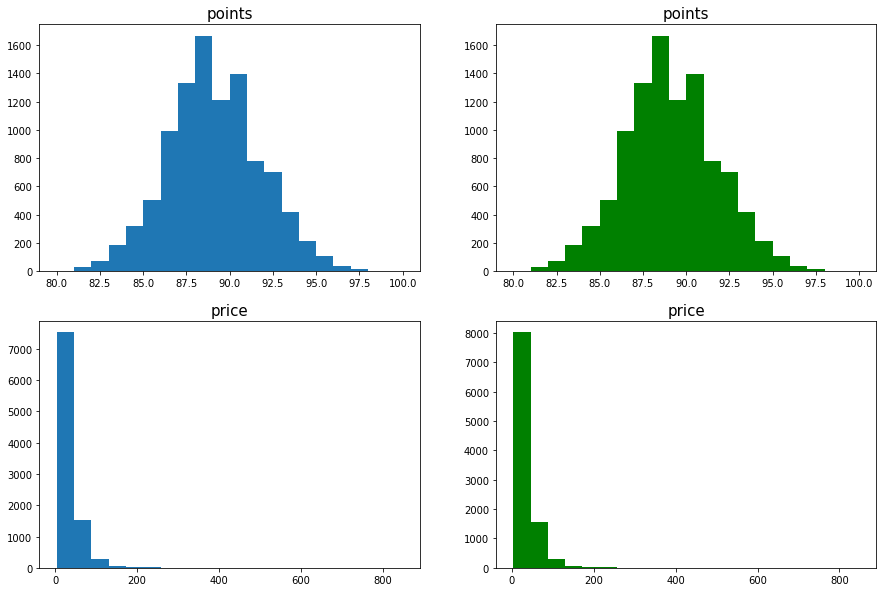

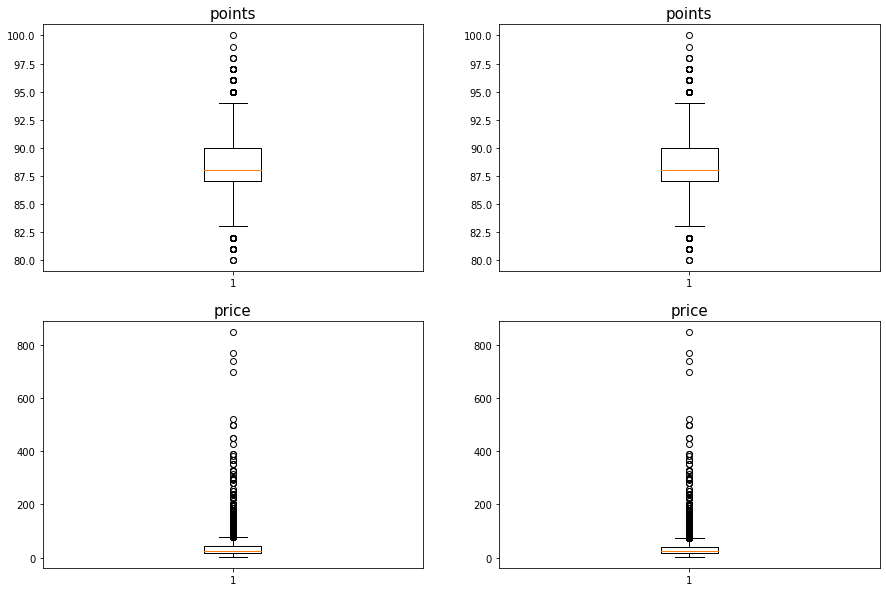

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# 通过数据对象之间的相似性来填补缺失值
def fillna_knn(data,predfeatname):
    # 用'NULL'(标称型属性)或-100(数值型属性)作为取值来填充非预测属性的缺失值
    data_filled = data.copy()
    for featname in data_filled.columns:
        if featname == predfeatname:
            continue
        if featname in num_features:
            data_filled[featname].fillna(-100,inplace=True)
        else:
            data_filled[featname].fillna('NULL',inplace=True)
        pass
    
    # 属性编码
    encx=preprocessing.OrdinalEncoder()
    encx.fit(data_filled.drop([predfeatname],axis=1))
    ency=preprocessing.OrdinalEncoder()
    ency.fit(data_filled[predfeatname].dropna(axis=0).values.reshape(-1,1))
    
    # 分割训练数据和预测数据
    data_train = data_filled[data_filled[predfeatname].notna()]
    data_pred = data_filled[data_filled[predfeatname].isna()]
    data_train_x = data_train.drop([predfeatname],axis=1)
    data_train_y = data_train[predfeatname]
    data_pred_x = data_pred.drop([predfeatname],axis=1)
    
    # 用KNN预测缺失值
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                               metric_params=None, n_jobs=1, n_neighbors=5, p=2, 
                               weights='uniform')
    knn.fit(encx.transform(data_train_x),ency.transform(data_train_y.values.reshape(-1,1)).ravel())
    pred_y = knn.predict(encx.transform(data_pred_x))
    data_pred_y = ency.inverse_transform(pred_y.reshape(-1,1))
    
    # 用预测的缺失值进行填充
    nanidxs = data_filled[data_filled.isna().values==True].index.values
    predidx = 0
    for idx in nanidxs:
        data.loc[idx,predfeatname] = data_pred_y[predidx][0]
        predidx = predidx+1
    pass

data_fill_knn = data_src.copy()
fillna_knn(data_fill_knn,'price')
fillna_knn(data_fill_knn,'country')
fillna_knn(data_fill_knn,'designation')
fillna_knn(data_fill_knn,'province')
fillna_knn(data_fill_knn,'region_1')

# 可视化数据
statNomFeatFreqs(data_src,data_fill_knn)
drawNumFeatHist(data_src,data_fill_knn)
drawNumFeatBoxPlot(data_src,data_fill_knn)

可见处理前后，数据集的总体统计特征无明显变化，说明对缺失值的预测较为合理。